In [1]:
import numpy
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Reading Data

In [2]:
train = pd.read_csv('../data/train.csv')
x = train.copy()
y = x['Survived']
x = x.drop(columns=['Survived'])

#  Analyzing Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
def visualize_scatter(df, x, y):
    df.plot(kind="scatter", x=x, y=y)

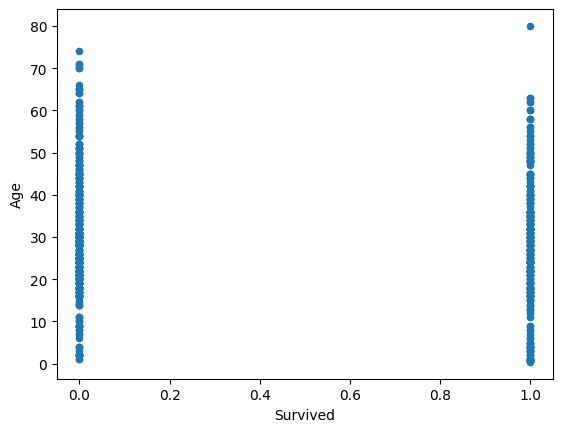

In [8]:
visualize_scatter(train, 'Survived', 'Age')

In [9]:
corr_matrix = train.corr()

/tmp/ipykernel_277/1550658072.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


In [10]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

# Cleaning Data

NAN age values will be turned into mean age value<p>
Sex values will be turned into binary values(male:1, female:0)

## Fixing Features

In [11]:
def clean_age(df):
    df['Age'] = df['Age'].fillna(value=df['Age'].mean())
    return df

def clean_sex(df):
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    return df

x = clean_age(x)
x = clean_sex(x)

x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## Removing unwanted Features

In [12]:
# Features we want
wanted_features = ['Fare', 'Parch', 'Pclass', 'Age', 'Sex']

def remove_unwanted_features(df, train=True):
    df = df[wanted_features]
    return df


x = remove_unwanted_features(x)
x.head()

,Fare,Parch,Pclass,Age,Sex
0,7.2500,0,3,22.0,1
1,71.2833,0,1,38.0,0
2,7.9250,0,3,26.0,0
3,53.1000,0,1,35.0,0
4,8.0500,0,3,35.0,1


# Analyzing data after cleaning 

In [13]:
x.head()

,Fare,Parch,Pclass,Age,Sex
0,7.2500,0,3,22.0,1
1,71.2833,0,1,38.0,0
2,7.9250,0,3,26.0,0
3,53.1000,0,1,35.0,0
4,8.0500,0,3,35.0,1


In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    891 non-null    float64
 1   Parch   891 non-null    int64  
 2   Pclass  891 non-null    int64  
 3   Age     891 non-null    float64
 4   Sex     891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


# Creating the model

In [15]:
# Choosing Logisitc Regression
logisticReg = LogisticRegression()

# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [16]:
# Training
logisticReg.fit(x_train, y_train)

LogisticRegression()

In [17]:
# Calculating Score
score = logisticReg.score(x_test, y_test)
score # 80% accuracy

0.7932960893854749